In [1]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
HealthIns = pd.read_csv(r"D:\iiit notes\Internship\12-seasion 26-May-2021\Health_Insurance.csv", header = 0)
HealthIns.head()

,Age,Gender,BMI,Children,Smoker,Region,Expenses
0,19,2,27.9,0,1,4,16884.92
1,18,1,33.8,1,0,3,1725.55
2,28,1,33.0,3,0,3,4449.46
3,33,1,22.7,0,0,2,21984.47
4,32,1,28.9,0,0,2,3866.86


In [3]:
HealthIns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1338 non-null   int64  
 1   Gender    1338 non-null   int64  
 2   BMI       1338 non-null   float64
 3   Children  1338 non-null   int64  
 4   Smoker    1338 non-null   int64  
 5   Region    1338 non-null   int64  
 6   Expenses  1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [4]:
HealthIns.corr()

,Age,Gender,BMI,Children,Smoker,Region,Expenses
Age,1.000000,0.020856,0.109341,0.042469,-0.025019,0.002127,0.299008
Gender,0.020856,1.000000,-0.046380,-0.017163,-0.076185,-0.004588,-0.057292
BMI,0.109341,-0.046380,1.000000,0.012645,0.003968,0.157439,0.198576
Children,0.042469,-0.017163,0.012645,1.000000,0.007673,0.016569,0.067998
Smoker,-0.025019,-0.076185,0.003968,0.007673,1.000000,-0.002181,0.787251
Region,0.002127,-0.004588,0.157439,0.016569,-0.002181,1.000000,-0.006208
Expenses,0.299008,-0.057292,0.198576,0.067998,0.787251,-0.006208,1.000000


In [5]:
IndepVar =[]

for col in HealthIns.columns:
    if col != 'Expenses':
        IndepVar.append(col)
        
TargetVar = 'Expenses'

x = HealthIns[IndepVar]
y = HealthIns[TargetVar]

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [7]:
from sklearn.linear_model import LinearRegression

mulreg = LinearRegression()
mulreg.fit(x_train, y_train)

LinearRegression()

In [8]:
y_pred = mulreg.predict(x_test)

In [9]:
from sklearn import metrics

print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test,y_pred),3))
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test,y_pred),3))
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),3))
print('Mean Absolute Percentage Error (MAPE):', round(metrics.mean_absolute_percentage_error(y_test,y_pred),3)*100, '%')
print('R2_score:', round(metrics.r2_score(y_test,y_pred),6))

Mean Absolute Error (MAE): 4154.7
Mean Squared Error (MSE): 33802383.555
Root Mean Squared Error (RMSE): 5813.982
Mean Absolute Percentage Error (MAPE): 44.1 %
R2_score: 0.769463


In [10]:
def MAPE(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred)/y_test))* 100

In [11]:
result = MAPE(y_test, y_pred)
print('Mean Asolute Percentage error:', round(result,3), '%')

Mean Asolute Percentage error: 44.122 %


In [12]:
# Calculate Adjusted R squared value

r_squared = round(metrics.r2_score(y_test, y_pred), 6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)

Adj R Square:  0.768424


In [15]:
# Predict charges for new customer : Name - Ram 

data = {'Age' : 45,
        'Gender' : 1,
        'BMI' : 35.50,
        'Children' : 4,
        'Smoker' : 1,
        'Region' : 3} 
index = [1] 
Ram_data = pd.DataFrame(data,index) 
Ram_data

,Age,Gender,BMI,Children,Smoker,Region
1,45,1,35.5,4,1,3


In [16]:
# Predicting the expenses by giving new data

Pred_Ram = mulreg.predict(Ram_data) 
print("Medical Expenses for Ram is : ", Pred_Ram)

Medical Expenses for Ram is :  [36415.27275815]


In [17]:
Results = pd.DataFrame({'Expenses':y_test, 'Expenses_pred':y_pred})
Results.head()

,Expenses,Expenses_pred
764,9095.07,8938.656851
887,5272.18,7062.787354
890,29330.98,36939.995651
1293,9301.89,9580.973660
259,33750.29,27000.270665


In [18]:
x_test.head()

,Age,Gender,BMI,Children,Smoker,Region
764,45,2,25.2,2,0,1
887,36,2,30.0,0,0,2
890,64,2,26.9,0,1,2
1293,46,1,25.7,3,0,2
259,19,1,31.9,0,1,2


In [19]:
ResultFinal = x_test.merge(Results, left_index=True, right_index = True)
ResultFinal.head()

,Age,Gender,BMI,Children,Smoker,Region,Expenses,Expenses_pred
764,45,2,25.2,2,0,1,9095.07,8938.656851
887,36,2,30.0,0,0,2,5272.18,7062.787354
890,64,2,26.9,0,1,2,29330.98,36939.995651
1293,46,1,25.7,3,0,2,9301.89,9580.973660
259,19,1,31.9,0,1,2,33750.29,27000.270665


# Decision Tree regressor

In [20]:

# Build decision tree regression model

from sklearn.tree import DecisionTreeRegressor

dcreg = DecisionTreeRegressor(criterion = 'mae', splitter = 'best', max_depth = 3)
dcreg.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mae', max_depth=3)

In [21]:
print(dcreg.get_params())

{'ccp_alpha': 0.0, 'criterion': 'mae', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [22]:
y_pred1 = dcreg.predict(x_test)

In [23]:
from sklearn import metrics

print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test,y_pred1),3))
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test,y_pred1),3))
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test,y_pred1)),3))
print('Mean Absolute Percentage Error (MAPE):', round(metrics.mean_absolute_percentage_error(y_test,y_pred1),3)*100, '%')
print('R2_score:', round(metrics.r2_score(y_test,y_pred1),6))

Mean Absolute Error (MAE): 2411.793
Mean Squared Error (MSE): 23696055.859
Root Mean Squared Error (RMSE): 4867.859
Mean Absolute Percentage Error (MAPE): 20.5 %
R2_score: 0.838389


In [24]:
def MAPE(y_test, y_pred1):
    y_test, y_pred1 = np.array(y_test), np.array(y_pred1)
    return np.mean(np.abs((y_test - y_pred1)/y_test))* 100

In [25]:
result = MAPE(y_test, y_pred1)
print('Mean Absolute Percentage Error (MAPE):', round(result, 3), '%')

Mean Absolute Percentage Error (MAPE): 20.484 %


In [26]:
r_squared = round(metrics.r2_score(y_test, y_pred1),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)

Adj R Square:  0.83766


In [27]:
HealthIns.corr()

,Age,Gender,BMI,Children,Smoker,Region,Expenses
Age,1.000000,0.020856,0.109341,0.042469,-0.025019,0.002127,0.299008
Gender,0.020856,1.000000,-0.046380,-0.017163,-0.076185,-0.004588,-0.057292
BMI,0.109341,-0.046380,1.000000,0.012645,0.003968,0.157439,0.198576
Children,0.042469,-0.017163,0.012645,1.000000,0.007673,0.016569,0.067998
Smoker,-0.025019,-0.076185,0.003968,0.007673,1.000000,-0.002181,0.787251
Region,0.002127,-0.004588,0.157439,0.016569,-0.002181,1.000000,-0.006208
Expenses,0.299008,-0.057292,0.198576,0.067998,0.787251,-0.006208,1.000000


In [29]:
HealthIns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1338 non-null   int64  
 1   Gender    1338 non-null   int64  
 2   BMI       1338 non-null   float64
 3   Children  1338 non-null   int64  
 4   Smoker    1338 non-null   int64  
 5   Region    1338 non-null   int64  
 6   Expenses  1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


Feature: 0, Score: 0.33007
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.21152
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.45842
Feature: 5, Score: 0.00000


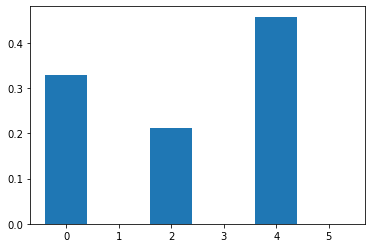

In [28]:
# Get feature importance

from matplotlib import pyplot

importance = dcreg.feature_importances_

# summarize feature importance

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [30]:
# Predicting the expenses by giving new data

Pred_Ram = dcreg.predict(Ram_data) 
print("Medical Expenses for Ram is : ", Pred_Ram)

Medical Expenses for Ram is :  [44260.75]
